In [1]:
import cv2
from numpy.core.defchararray import title
import skimage
import numpy as np
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from skimage import io
import matplotlib.pyplot as plt
from skimage.morphology import closing, square
import matplotlib.patches as mpatches

In [2]:
###Functions
def GetAreas(img, verbose=False,
    min_size = 500,  
    max_size = 900,
    number_of_bacteria = -1
    ):
    blur = cv2.boxFilter(img,-1,(5,5), normalize = True)
    if verbose:
        plt.imshow(blur)
        plt.show()
    ret,thresh1 = cv2.threshold(blur,90,255,cv2.THRESH_BINARY)
    thresh1=255-thresh1
    if verbose:
        plt.imshow(thresh1)
    kernel = np.ones((5,5),np.uint8)
    closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
    if verbose:
        plt.imshow(opening)
        plt.show()
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(opening, connectivity=8)
    sizes = stats[1:, -1]; nb_components = nb_components - 1

    #your answer image
    img2 = np.zeros((output.shape))
    #for every component in the image, you keep it only if it's above min_size
    for i in range(0, nb_components):
        if max_size>=sizes[i] >= min_size:
            img2[output == i + 1] = 255
    if verbose:
        plt.imshow(img2)
        plt.show()
    cleared = clear_border(img2)
    if verbose:
        plt.imshow(cleared)
        plt.show()
    label_image = label(cleared)
    if verbose:
        plt.imshow(label_image)
        plt.show()
    image_label_overlay = label2rgb(label_image, image=cleared, bg_label=0)
    areas = []
    if number_of_bacteria==-1:
        number_of_bacteria=len(regionprops(label_image))
    for region in regionprops(label_image):
        areas.append(region.area)
    if verbose:
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.imshow(image_label_overlay)
    
        for region in regionprops(label_image):
            # take regions with large enough areas
            # draw rectangle around segmented coins
            if region.feret_diameter_max>30:
                minr, minc, maxr, maxc = region.bbox
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                        fill=False, edgecolor='red', linewidth=2)
                ax.add_patch(rect)

        ax.set_axis_off()
        plt.tight_layout()
        plt.show()
    #print(np.mean(areas), np.std(areas))
    return areas,number_of_bacteria

20210319_KP_0016_50_Stack_3dstack.tif


100%|██████████| 16/16 [00:22<00:00,  1.44s/it]

0 504.02985074626866 174.56859150140295
1 616.2451612903226 324.8207514016046
2 620.3677419354839 340.11445927956396
3 586.0132450331126 331.69097136765834
4 569.6533333333333 324.97177285966785
5 553.6510067114094 343.18224415072643
6 539.1156462585034 324.2641175314652
7 522.0567375886525 325.0268679139502
8 515.544776119403 315.06610573048596
9 476.29787234042556 300.68752765329856
10 498.50735294117646 329.609082102963
11 515.1162790697674 342.4967068909071
12 515.3387096774194 351.12914376100287
13 505.9193548387097 363.4639041574696
14 494.2032520325203 366.4748121725475
15 467.016 344.4481727981729
0 504.02985074626866
1 712.820895522388
2 717.5895522388059
3 660.3582089552239
4 637.6716417910447
5 615.6268656716418
6 591.4179104477612
7 549.3283582089553
8 515.544776119403
9 501.17910447761193
10 505.94776119402985
11 495.8955223880597
12 476.8805970149254
13 468.1641791044776
14 453.63432835820896
15 435.64925373134326


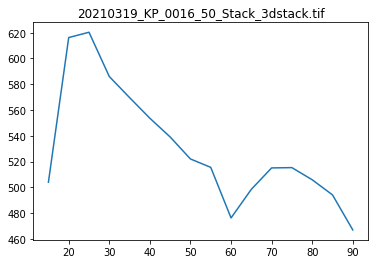

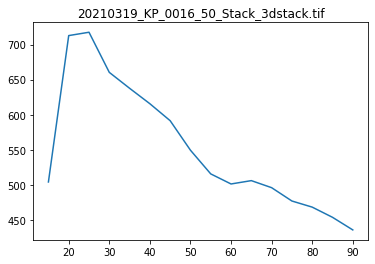

20210429_KP_0140_50_Stack_3dstack.tif


100%|██████████| 16/16 [00:31<00:00,  1.97s/it]

0 524.3079584775087 152.53688182628315
1 630.8181818181819 301.8129423491005
2 687.614730878187 331.49909994963866
3 715.9663865546219 355.7565717817938
4 736.3719008264463 335.75331522863695
5 757.4054054054054 342.0152643550616
6 791.4598930481284 342.2944634789333
7 819.9442970822281 332.6824575880732
8 817.9872448979592 351.10436168821803
9 860.8549618320611 400.2366244539105
10 881.4582278481013 393.32957823668283
11 879.3940886699507 393.4204151022712
12 887.2584541062802 398.7752728362549
13 893.5338164251208 414.72475892818795
14 921.2397094430993 421.9184057215309
15 928.2668269230769 426.3856973891227
0 524.3079584775087
1 768.3321799307959
2 839.8892733564014
3 884.4290657439446
4 924.923875432526
5 969.6885813148789
6 1024.242214532872
7 1069.6159169550174
8 1109.5190311418685
9 1170.643598615917
10 1204.7612456747404
11 1235.4117647058824
12 1271.0207612456747
13 1280.0103806228374
14 1316.5121107266436
15 1336.190311418685


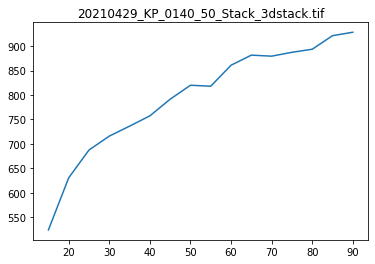

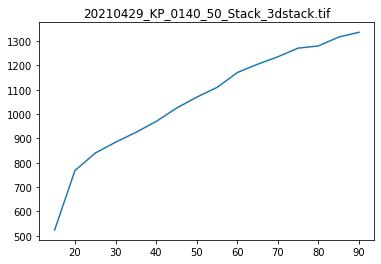

20210428_KP_0142_50_Stack_3dstack.tif


100%|██████████| 16/16 [00:22<00:00,  1.41s/it]

0 310.67455621301775 85.52577038501894
1 302.355421686747 98.36947899788916
2 309.0297619047619 98.1936513316827
3 317.5240963855422 102.96143281967217
4 330.77575757575755 107.35014087386286
5 349.6753246753247 117.71707680005112
6 367.40384615384613 131.01016690074457
7 387.41317365269464 136.11241591631028
8 399.55629139072846 139.63047902352457
9 425.9751552795031 157.29301494485293
10 446.4909090909091 165.4717999661031
11 457.093567251462 174.0651303614327
12 472.21153846153845 187.07053412726114
13 517.2292993630573 189.07080440367588
14 494.94117647058823 199.01890852770018
15 515.4679487179487 201.14098958358548
0 310.67455621301775
1 296.9881656804734
2 307.20118343195264
3 311.88757396449705
4 322.94674556213016
5 318.6390532544379
6 339.14201183431953
7 382.8284023668639
8 357.0
9 405.81065088757396
10 435.9230769230769
11 462.50295857988164
12 435.88757396449705
13 480.50295857988164
14 448.08284023668637
15 475.8165680473373


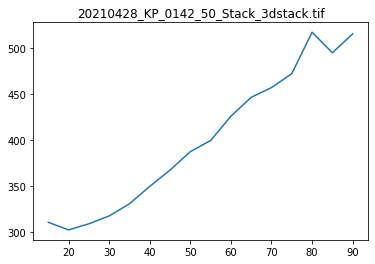

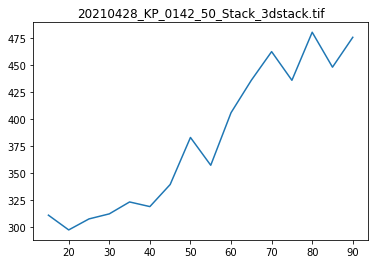

20210428_KP_0010_50_Stack_3dstack.tif


100%|██████████| 16/16 [00:32<00:00,  2.02s/it]

0 273.93728222996515 98.63459597386363
1 330.03065134099614 160.36665071649986
2 319.19875776397515 124.95039114346163
3 348.9247648902821 163.77402615724355
4 376.1666666666667 185.15360607651488
5 393.37654320987656 186.87691583499878
6 424.14240506329116 209.86892075296223
7 434.45535714285717 204.06000613117064
8 441.8514285714286 213.6793744594638
9 467.75366568914956 214.1070614145171
10 481.9511494252874 209.52591649384777
11 500.08849557522126 221.18639175398366
12 500.05390835579516 209.09986085808453
13 496.4447513812155 223.9172930568574
14 540.8050139275766 240.98455405937284
15 548.4059945504088 237.72641584898224
0 273.93728222996515
1 300.13240418118465
2 358.1254355400697
3 387.8292682926829
4 401.0696864111498
5 444.0905923344948
6 467.0
7 508.6306620209059
8 538.8432055749129
9 555.7630662020906
10 584.3867595818815
11 590.6968641114983
12 646.4111498257839
13 626.177700348432
14 676.4773519163763
15 701.2717770034843


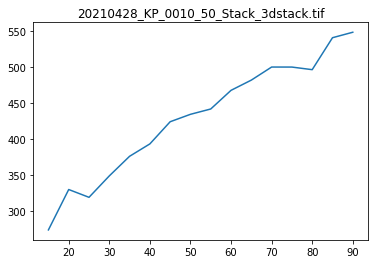

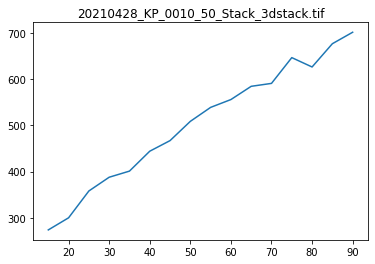

20210429_KP_0120_50_Stack_3dstack.tif


100%|██████████| 16/16 [00:20<00:00,  1.29s/it]

0 308.990099009901 102.7611375332081
1 334.969696969697 129.3085304665679
2 352.9009900990099 138.49462976688744
3 381.08910891089107 145.88175728687582
4 400.77669902912623 153.99299769976523
5 429.10377358490564 172.72002261514197
6 449.10185185185185 167.08336463368036
7 475.6608695652174 191.68129740054687
8 516.8272727272728 195.9515644740677
9 538.787610619469 216.3716260383229
10 589.3130434782609 217.8463904448905
11 606.0338983050848 233.39411391512633
12 639.6837606837607 257.66577601506765
13 665.1842105263158 277.42565199035124
14 683.2 289.65941756106974
15 714.2162162162163 308.0505517601568
0 308.990099009901
1 328.33663366336634
2 352.9009900990099
3 381.08910891089107
4 408.71287128712873
5 450.34653465346537
6 480.2277227722772
7 541.5940594059406
8 562.8811881188119
9 602.8019801980198
10 671.0
11 708.039603960396
12 741.019801980198
13 750.8019801980198
14 744.0792079207921
15 784.9306930693069


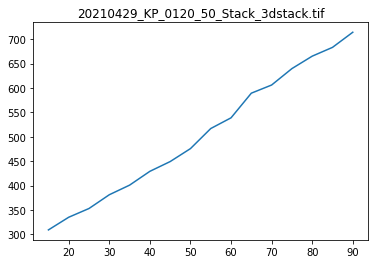

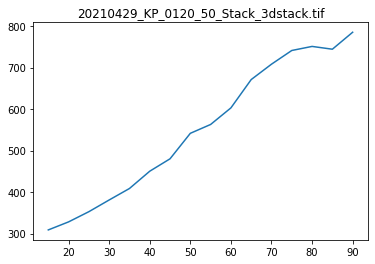

In [3]:
#fl = "./20210428_KP_0142_50_Stack_3dstack.tif"
import os
files = [f for f in os.listdir("./") if f.endswith("tif")]

for fl in files:
    print(fl)
    #fl = "./20210429_KP_0140_50_Stack_3dstack.tif"
    img=io.imread(f"./{fl}")
    img_norm=(img-np.min(img))/(np.max(img)-np.min(img))
    img_norm_0_255 = (img_norm*255).astype(np.uint8)
    from tqdm import tqdm
    Areas = []
    counter =0
    expov = [2**i for i in range(16)]
    #print(expov)
    number_of_backteria=-1
    for img in tqdm(img_norm_0_255):
        area,number_of_backteria=GetAreas(img, False,150, 900**expov[counter],number_of_backteria)
        Areas.append([area,number_of_backteria])
        counter+=1

    for i,ar in enumerate(Areas):
        print(i, np.mean(ar[0]), np.std(ar[0]))
    for i,ar in enumerate(Areas):
        print(i, np.sum(ar[0])/ar[1])
    #%%
    plt.title(fl)
    plt.plot( range(15,91,5),[np.mean(ar[0]) for ar in Areas])
    plt.show()
    plt.title(fl)
    plt.plot( range(15,91,5),[np.sum(ar[0])/ar[1]for ar in Areas])
    plt.show()

In [4]:
import os
files = [f for f in os.listdir("./") if f.endswith("tif")]
results = {}
for fl in files:
    print(fl)
    #fl = "./20210429_KP_0140_50_Stack_3dstack.tif"
    img=io.imread(f"./{fl}")
    img_norm=(img-np.min(img))/(np.max(img)-np.min(img))
    img_norm_0_255 = (img_norm*255).astype(np.uint8)
    from tqdm import tqdm
    Areas = []
    counter =0
    expov = [2**i for i in range(16)]
    #print(expov)
    number_of_backteria=-1
    for img in tqdm(img_norm_0_255):
        area,number_of_backteria=GetAreas(img, False,150, 900**expov[counter],number_of_backteria)
        Areas.append([area,number_of_backteria])
        counter+=1
    results[fl]=Areas

20210319_KP_0016_50_Stack_3dstack.tif


100%|██████████| 16/16 [00:21<00:00,  1.34s/it]


20210429_KP_0140_50_Stack_3dstack.tif


100%|██████████| 16/16 [00:29<00:00,  1.82s/it]


20210428_KP_0142_50_Stack_3dstack.tif


100%|██████████| 16/16 [00:21<00:00,  1.34s/it]


20210428_KP_0010_50_Stack_3dstack.tif


100%|██████████| 16/16 [00:30<00:00,  1.90s/it]


20210429_KP_0120_50_Stack_3dstack.tif


100%|██████████| 16/16 [00:19<00:00,  1.22s/it]


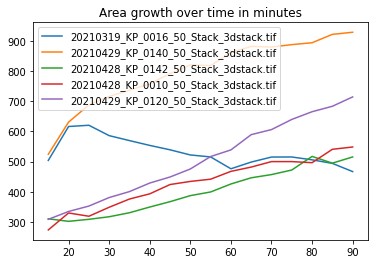

In [5]:
for fl in results:
    Areas=results[fl]
    plt.plot( range(15,91,5),[np.mean(ar[0]) for ar in Areas])
plt.title("Area growth over time in minutes")
plt.legend(list(results.keys()))
plt.show()

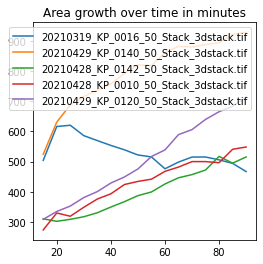

In [6]:
plt.figure(figsize=(4,4))
for fl in results:
    Areas=results[fl]
    plt.plot( range(15,91,5),[np.mean(ar[0]) for ar in Areas])
plt.title("Area growth over time in minutes")
plt.legend(list(results.keys()))
plt.show()

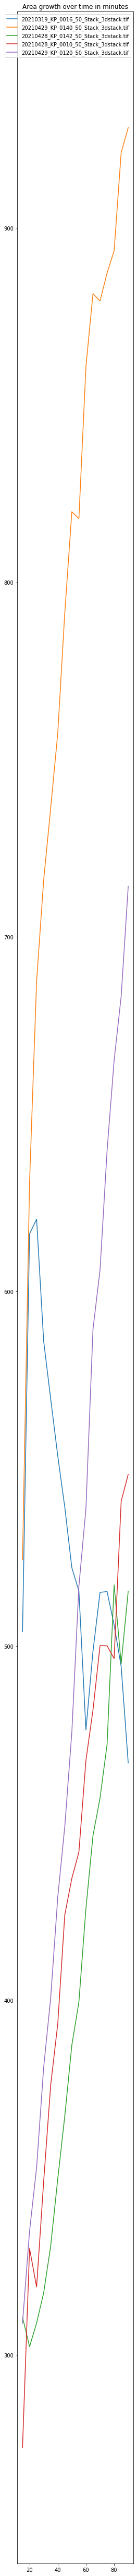

In [7]:
plt.figure(figsize=(4,90))
for fl in results:
    Areas=results[fl]
    plt.plot( range(15,91,5),[np.mean(ar[0]) for ar in Areas])
plt.title("Area growth over time in minutes")
plt.legend(list(results.keys()))
plt.show()

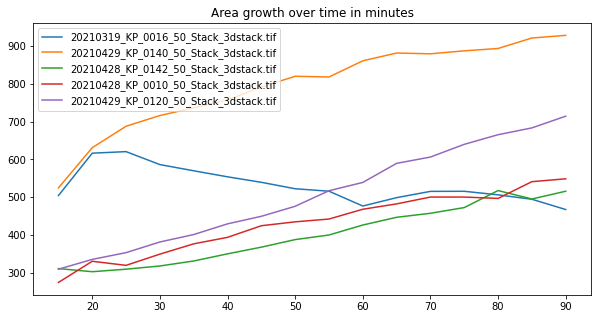

In [8]:
plt.figure(figsize=(10,5))
for fl in results:
    Areas=results[fl]
    plt.plot( range(15,91,5),[np.mean(ar[0]) for ar in Areas])
plt.title("Area growth over time in minutes")
plt.legend(list(results.keys()))
plt.show()

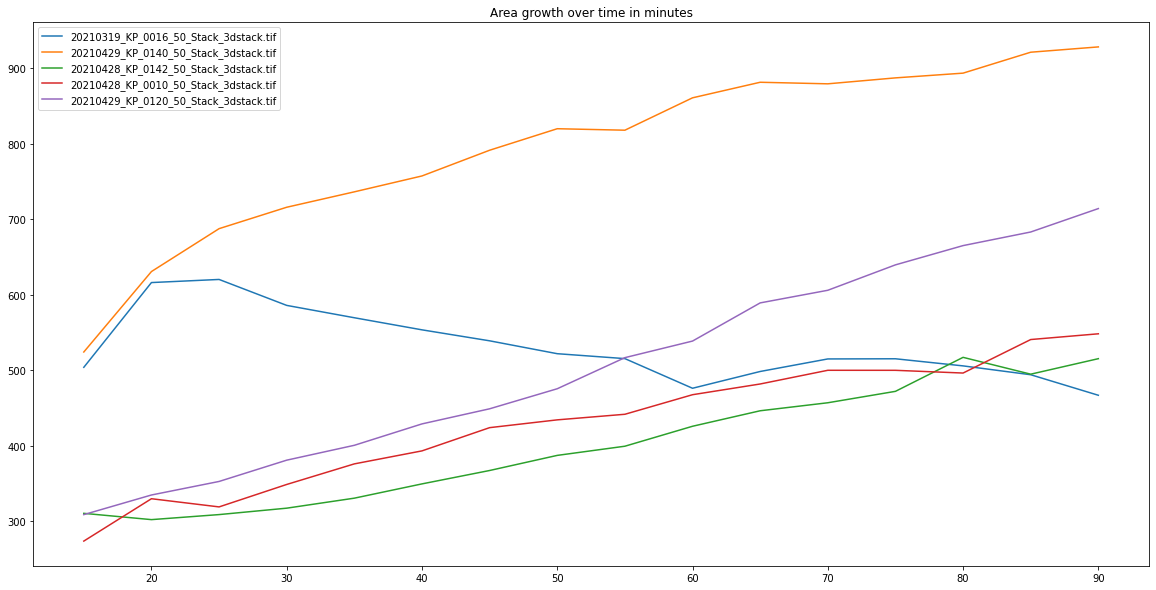

In [9]:
plt.figure(figsize=(20,10))
for fl in results:
    Areas=results[fl]
    plt.plot( range(15,91,5),[np.mean(ar[0]) for ar in Areas])
plt.title("Area growth over time in minutes")
plt.legend(list(results.keys()))
plt.show()

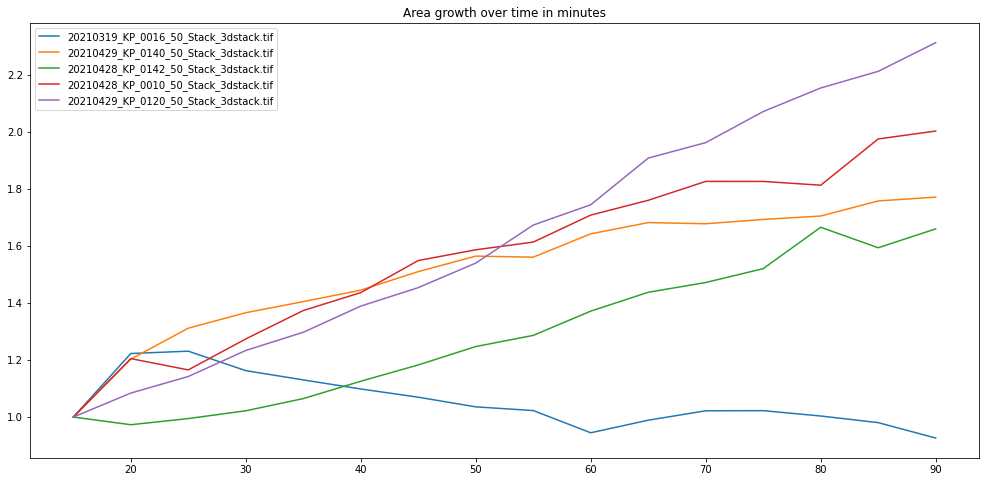

In [10]:
plt.figure(figsize=(17,8))
for fl in results:
    Areas=results[fl]
    plt.plot( range(15,91,5),[np.mean(ar[0])/np.mean(Areas[0][0]) for ar in Areas])
plt.title("Area growth over time in minutes")
plt.legend(list(results.keys()))
plt.show()

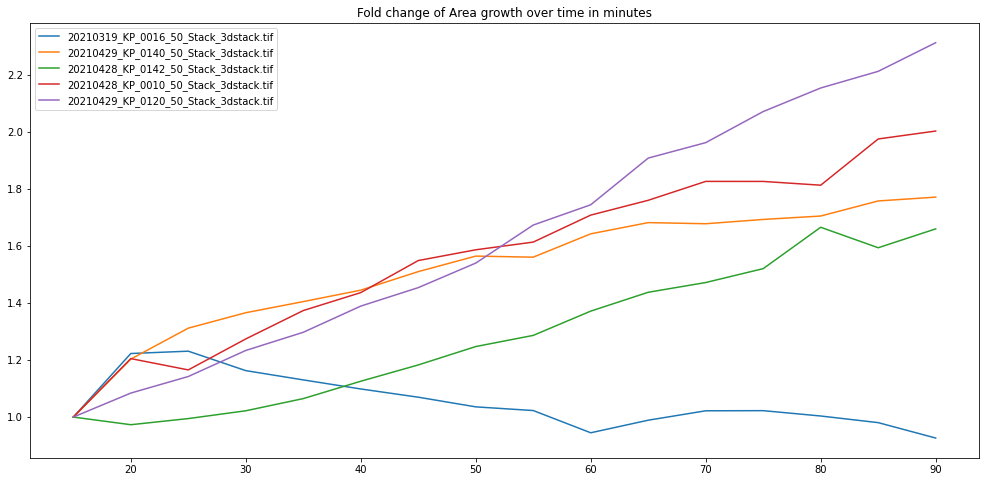

In [11]:
plt.figure(figsize=(17,8))
for fl in results:
    Areas=results[fl]
    plt.plot( range(15,91,5),[np.mean(ar[0])/np.mean(Areas[0][0]) for ar in Areas])
plt.title("Fold change of Area growth over time in minutes")
plt.legend(list(results.keys()))
plt.show()

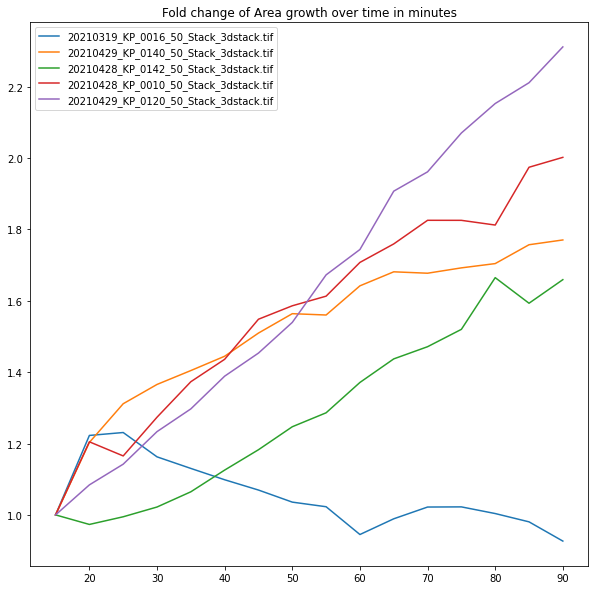

In [12]:
plt.figure(figsize=(10,10))
for fl in results:
    Areas=results[fl]
    plt.plot( range(15,91,5),[np.mean(ar[0])/np.mean(Areas[0][0]) for ar in Areas])
plt.title("Fold change of Area growth over time in minutes")
plt.legend(list(results.keys()))
plt.show()

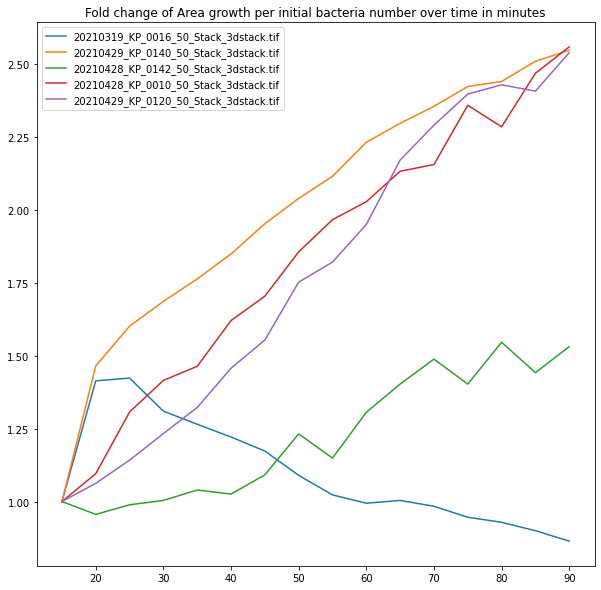

In [13]:
plt.figure(figsize=(10,10))
for fl in results:
    Areas=results[fl]
    itms=[(np.sum(ar[0])/ar[1])/(np.sum(Areas[0][0])/Areas[0][1])for ar in Areas]
    plt.plot( range(15,91,5),itms)
plt.title("Fold change of Area growth per initial bacteria number over time in minutes")
plt.legend(list(results.keys()))
plt.show()